In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from wrf import getvar, ll_to_xy
import numpy as np
import pandas as pd
from matplotlib.colors import BoundaryNorm
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
import adjustText as aT

In [6]:
path_cetesb = '../PythonObsData/cetesb_station_2017_codes_qualr.csv'
cetesb_station =  pd.read_csv(path_cetesb,encoding = "ISO-8859-1")
OUTPUT = '~/Google_Drive/USP/Dissertation/data/4_Draft_Report/Dissertation/fig'
ncfile= Dataset('/Volumes/passport/Dissertation/data/wrfinput/wrfinput_d01')
hgt = getvar(ncfile, 'HGT')
hgt_values = hgt.values
lat = getvar(ncfile,'XLAT').values
lon = getvar(ncfile,'XLONG').values

In [7]:
lati = list(cetesb_station["lat"])
longi = list(cetesb_station["lon"])

x0 = -47.2; x1 = -45.7; y0 = -23.1; y1 = -24.1;

In [9]:
px0,py0 = ll_to_xy(ncfile, latitude=y0, longitude=x0).values
px1,py1 = ll_to_xy(ncfile, latitude=y1, longitude=x1).values

new_x0 = lon[py0,px0]
new_x1 = lon[py1,px1]
new_y0 = lat[py0,px0]
new_y1 = lat[py1,px1]
                
lat_new = lat[py1:py0+1,px0:px1+3]
lon_new = lon[py1:py0+1,px0-1:px1+2]
                
data_final = hgt_values[py1:py0+1,px0-1:px1+2]
levels = MaxNLocator(nbins=12).tick_values(0.0, hgt.values.max())
cmap = cm.get_cmap("Oranges",lut=25)
cmap.set_bad("w")
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

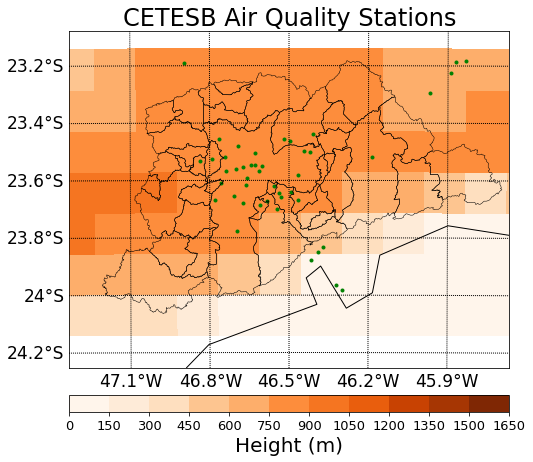

In [31]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)
m = Basemap(width=170000,
            height=130000,
            rsphere=(6378137.00,6356752.3142),
            resolution='l', area_thresh=10000.,
            projection='lcc',
            lat_1 = -23.6673, lat_2 = -23.6673, 
            lat_0 = -23.66729, lon_0 = -46.499)
#m.etopo()
m.drawcoastlines(color='k', linewidth=1.0)
m.drawstates(linewidth=1.5)
m.drawparallels(np.arange(-90., 120., 0.2), 
                labels=[1, 0, 0, 0],fontsize=17)
m.drawmeridians(np.arange(-180., 181., 0.3), 
                labels=[0, 0, 0, 1],fontsize=17)
m.readshapefile('../3_Modeling/MunRM07','sp',default_encoding='iso-8859-15')
x_n, y_n = m(lon_new, lat_new)
x,y=m(longi,lati)
trend=m.pcolormesh(x_n, y_n, data_final, cmap=cmap, norm = norm)
m.scatter(longi, lati, latlon=True, c = 'g',marker='.')
plt.clim(3, 7)

############ Doesn't work
#texts = []
#for i, j, label in zip(x,y,cetesb_station.code):
#    texts.append(plt.text(i, j, label,fontsize = 11,color='black'))
#aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(1,1), expand_text=(1,1), 
#                arrowprops=dict(arrowstyle="->", color='red', lw=0.9))
############

cbar = m.colorbar(trend, location='bottom', pad="8%", ticks=levels)
cbar.set_label('Height (m)', fontsize=20)
cbar.ax.tick_params(labelsize=13) 
titulo = "Metropolitan area of São Paulo"
ax.set_title("CETESB Air Quality Stations", fontsize=24)
wsize = 400
hsize = 400
#fig.savefig(OUTPUT+'area_estudo_rmsp.jpg')
plt.show()